<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Agro.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
df

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5.932,854,537,13.692,111.190,252.0,38.0,38.0,...,NaN,"25.511.889,220","18.911.068,400","1.665.392,540",80.0,0.0,"32,065",SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27.505,5.680,4.778,104.977,554.663,671.0,3.0,3.0,...,"1.777.256,000","63.002.672,933","45.304.154,440","538.882,600",299.0,3.0,"55,065",MG,Elói Mendes,Sudeste
2,2016,3552007,6.193,668,580,12.519,62.441,83.0,0.0,0.0,...,NaN,"30.492.825,449","21.861.157,950","1.048.458,040",59.0,2.0,"14,930",SP,Silveiras,Sudeste
3,2016,3305604,21.279,3.087,2.669,80.161,403.121,290.0,0.0,0.0,...,NaN,"140.538.926,872","100.508.822,360","871.234,340",272.0,2.0,"22,698",RJ,Silva Jardim,Sudeste
4,2016,1717008,4.534,212,183,5.309,48.551,34.0,94.0,34.0,...,NaN,"15.541.375,953","13.178.989,760","8.037,870",43.0,1.0,"2,908",TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7.171,463,436,10.502,NaN,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,135.0,3.0,"83,287",AL,Monteirópolis,Nordeste
33416,2021,1600105,9.265,428,383,9.932,NaN,38.0,0.0,0.0,...,NaN,NaN,NaN,NaN,160.0,2.0,"1,010",AP,Amapá,Norte
33417,2019,2605459,3.061,2.210,1.773,43.093,192.775,289.0,0.0,0.0,...,NaN,NaN,NaN,NaN,32.0,1.0,"180,059",PE,Fernando de Noronha,Nordeste
33418,2020,1503002,7.070,538,514,12.207,63.579,32.0,0.0,0.0,...,NaN,NaN,NaN,NaN,149.0,4.0,"0,601",PA,Faro,Norte


In [12]:
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
df

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

C:\Users\Renan\AppData\Local\Temp\ipykernel_5888\1254699193.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData\Local\Temp\ipykernel_5888\1254699193.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData\Local\Temp\ipykernel_5888\1254699193.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros
C:\Users\Renan\AppData

,Ano,CDMunicipio,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,AreaPlantada_h,AreaColhida_h,...,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,NrNascimentos,NrObitosInfantis,povoamento,UF,Municipio,Regiao
0,2016,3509452,5932,854,537,13692,111190,2520,380,380,...,0,25511889.220,18911068.400,1665392.540,800,0,32.065,SP,Campina do Monte Alegre,Sudeste
1,2016,3123601,27505,5680,4778,104977,554663,6710,30,30,...,1777256.000,63002672.933,45304154.440,538882.600,2990,30,55.065,MG,Elói Mendes,Sudeste
2,2016,3552007,6193,668,580,12519,62441,830,00,00,...,0,30492825.449,21861157.950,1048458.040,590,20,14.930,SP,Silveiras,Sudeste
3,2016,3305604,21279,3087,2669,80161,403121,2900,00,00,...,0,140538926.872,100508822.360,871234.340,2720,20,22.698,RJ,Silva Jardim,Sudeste
4,2016,1717008,4534,212,183,5309,48551,340,940,340,...,0,15541375.953,13178989.760,8037.870,430,10,2.908,TO,Pindorama do Tocantins,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,2705408,7171,463,436,10502,0,320,00,00,...,0,0,0,0,1350,30,83.287,AL,Monteirópolis,Nordeste
33416,2021,1600105,9265,428,383,9932,0,380,00,00,...,0,0,0,0,1600,20,1.010,AP,Amapá,Norte
33417,2019,2605459,3061,2210,1773,43093,192775,2890,00,00,...,0,0,0,0,320,10,180.059,PE,Fer0do de Noronha,Nordeste
33418,2020,1503002,7070,538,514,12207,63579,320,00,00,...,0,0,0,0,1490,40,0.601,PA,Faro,Norte


In [13]:
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)



5.  Como está distribuída a produção agrícola entre os 10 maiores produtores agricolas do Dataset?

Produção agrícola de cada um dos TOP 10 municípios para cada ano: Isso permite ver a contribuição anual de cada município e como isso muda ao longo do tempo.

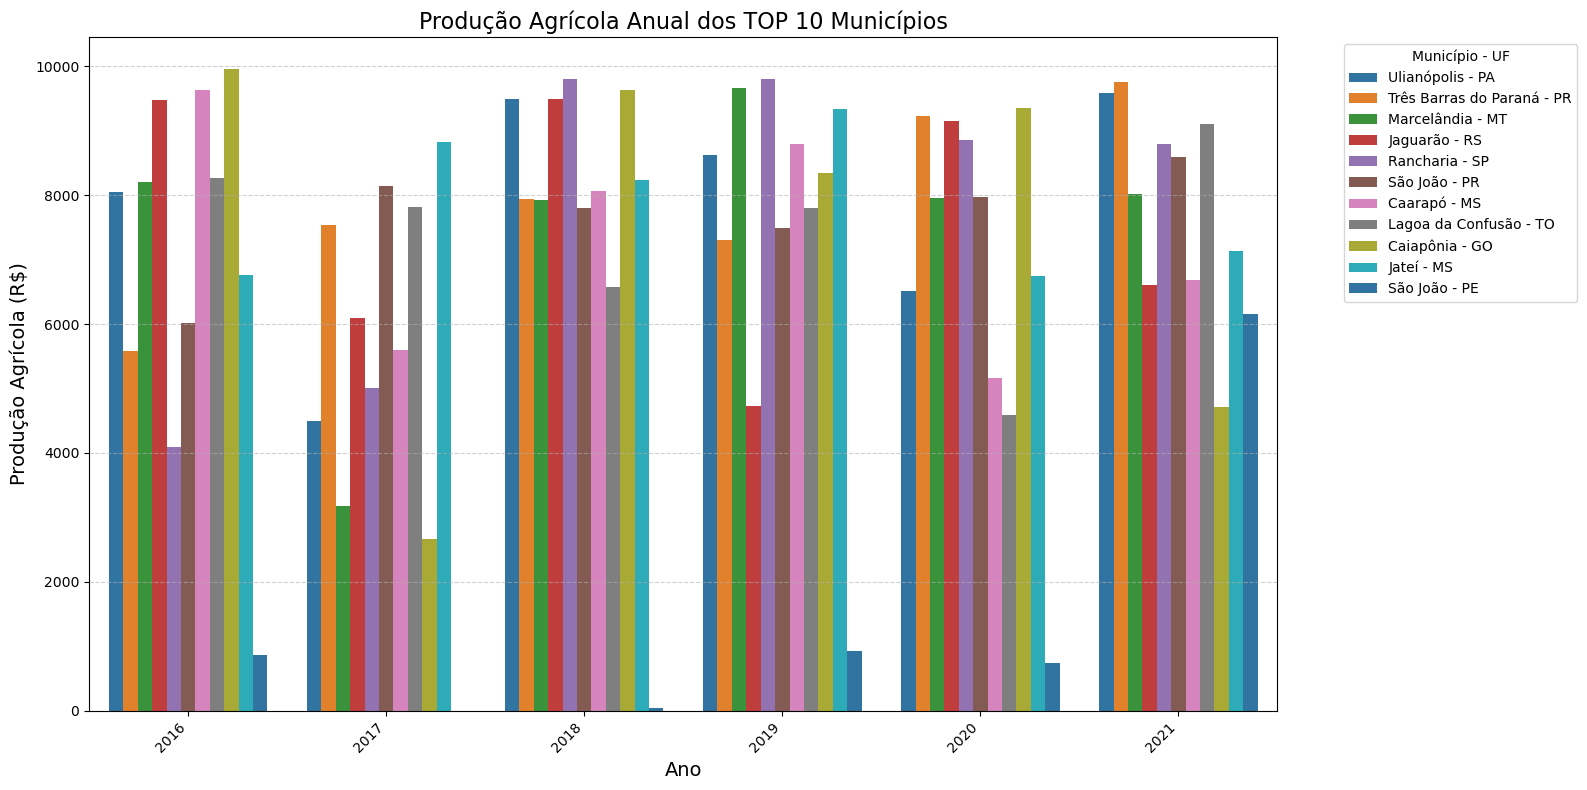

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é o seu DataFrame carregado
# e que as colunas 'Municipio', 'VlProducaoAgricola' e 'UF' estão presentes
# e 'VlProducaoAgricola' está em formato numérico

# (Código para selecionar os TOP 10 municípios - igual ao anterior)
df_total_mun_uf = df.groupby(["Municipio", "UF"])["VlProducaoAgricola"].sum().reset_index()
df_total_mun_uf['Municipio_UF'] = df_total_mun_uf['Municipio'] + ' - ' + df_total_mun_uf['UF']
top_10_municipios_uf = df_total_mun_uf.nlargest(10, 'VlProducaoAgricola')['Municipio_UF'].tolist()
top_10_municipios = df_total_mun_uf.nlargest(10, 'VlProducaoAgricola')['Municipio'].tolist()

df_top10 = df[df["Municipio"].isin(top_10_municipios)].copy()
df_top10['Municipio_UF'] = df_top10['Municipio'] + ' - ' + df_top10['UF']

# Plotar a produção agrícola anual para cada um dos TOP 10
plt.figure(figsize=(16, 8)) # Aumentar o tamanho para acomodar mais barras/grupos
sns.barplot(data=df_top10, x='Ano', y='VlProducaoAgricola', hue='Municipio_UF', palette='tab10')

plt.title('Produção Agrícola Anual dos TOP 10 Municípios', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Agrícola (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotacionar labels do eixo x para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Município - UF", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Comparar a Produção Agrícola Média ou Mediana por Município (Gráfico de Barras)

Você pode simplesmente mostrar a produção agrícola média ou mediana para cada um dos TOP 10 municípios ao longo de todos os anos. Isso dá uma visão geral da magnitude da produção de cada um.

<ipython-input-10-9c05a447fffc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_producao_media_top10, x='VlProducaoAgricola', y='Municipio_UF', palette='viridis')


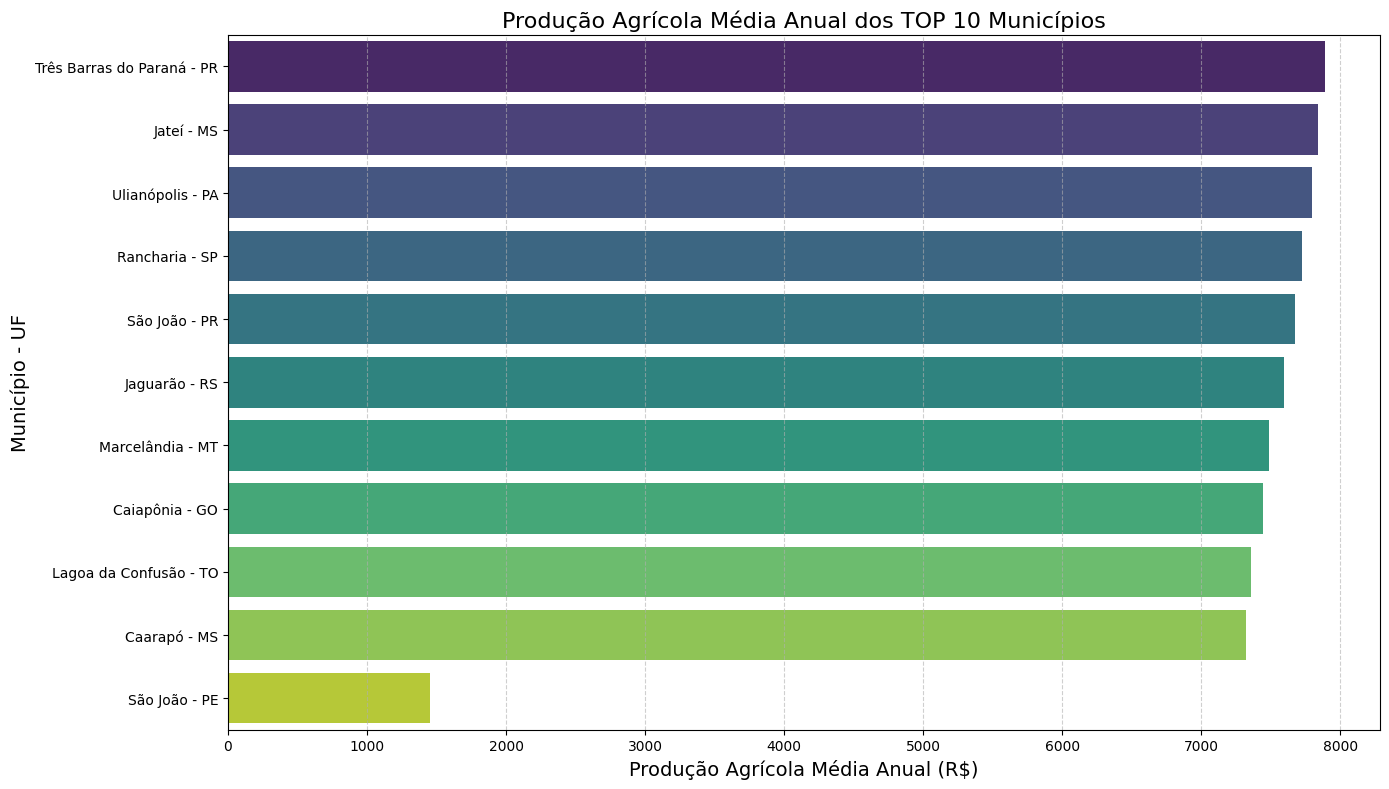

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é o seu DataFrame carregado
# e que as colunas 'Municipio', 'VlProducaoAgricola' e 'UF' estão presentes
# e 'VlProducaoAgricola' está em formato numérico

# (Código para selecionar os TOP 10 municípios - igual ao anterior)
df_total_mun_uf = df.groupby(["Municipio", "UF"])["VlProducaoAgricola"].sum().reset_index()
df_total_mun_uf['Municipio_UF'] = df_total_mun_uf['Municipio'] + ' - ' + df_total_mun_uf['UF']

# Agora, calculamos a produção média por município para os TOP 10
# Filtramos o dataframe original para ter apenas os TOP 10
top_10_municipios = df_total_mun_uf.nlargest(10, 'VlProducaoAgricola')['Municipio'].tolist()
df_top10_filtered = df[df["Municipio"].isin(top_10_municipios)].copy()
df_top10_filtered['Municipio_UF'] = df_top10_filtered['Municipio'] + ' - ' + df_top10_filtered['UF']

# Agrupamos por Municipio_UF e calculamos a média
df_producao_media_top10 = df_top10_filtered.groupby('Municipio_UF')['VlProducaoAgricola'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(data=df_producao_media_top10, x='VlProducaoAgricola', y='Municipio_UF', palette='viridis')

plt.title('Produção Agrícola Média Anual dos TOP 10 Municípios', fontsize=16)
plt.xlabel('Produção Agrícola Média Anual (R$)', fontsize=14)
plt.ylabel('Município - UF', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Analisando a Taxa de Crescimento Anual da Produção Agrícola

Em vez de valores absolutos ou acumulados, podemos analisar a taxa de crescimento percentual da produção agrícola ano a ano para cada município. Isso pode revelar tendências de crescimento ou declínio que não são visíveis na CDF.


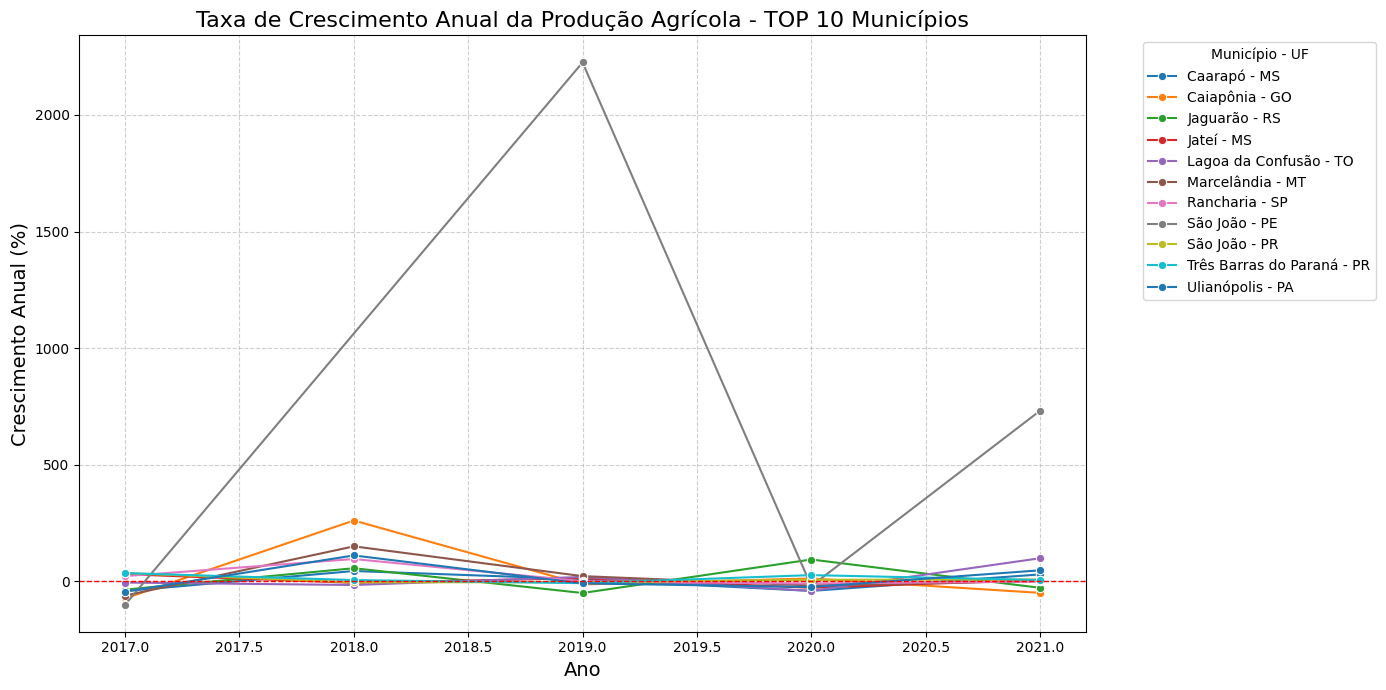

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é o seu DataFrame carregado
# e que as colunas 'Municipio', 'VlProducaoAgricola' e 'Ano' estão presentes
# e 'VlProducaoAgricola' está em formato numérico

# (Código para selecionar os TOP 10 municípios - igual ao anterior)
df_total_mun_uf = df.groupby(["Municipio", "UF"])["VlProducaoAgricola"].sum().reset_index()
df_total_mun_uf['Municipio_UF'] = df_total_mun_uf['Municipio'] + ' - ' + df_total_mun_uf['UF']
top_10_municipios_uf = df_total_mun_uf.nlargest(10, 'VlProducaoAgricola')['Municipio_UF'].tolist()
top_10_municipios = df_total_mun_uf.nlargest(10, 'VlProducaoAgricola')['Municipio'].tolist()

df_top10 = df[df["Municipio"].isin(top_10_municipios)].copy()
df_top10['Municipio_UF'] = df_top10['Municipio'] + ' - ' + df_top10['UF']

# Ordenar por Município_UF e Ano
df_top10_sorted = df_top10.sort_values(by=["Municipio_UF", "Ano"])

# Calcular a variação percentual ano a ano
df_top10_sorted['Crescimento_Pct'] = df_top10_sorted.groupby('Municipio_UF')['VlProducaoAgricola'].pct_change() * 100

# Remover o primeiro ano de cada município (já que pct_change no primeiro valor é NaN)
df_crescimento = df_top10_sorted.dropna(subset=['Crescimento_Pct'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_crescimento, x='Ano', y='Crescimento_Pct', hue='Municipio_UF', palette='tab10', marker='o')

plt.title('Taxa de Crescimento Anual da Produção Agrícola - TOP 10 Municípios', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Crescimento Anual (%)', fontsize=14)
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Linha de referência no 0%
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Município - UF", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Uma discrepância crescente pode indicar perdas por fatores climáticos, pragas ou mudanças no uso do solo.

6. Estabelecendo uma relação entre Pessoal Ocupado e Produção Agrícola

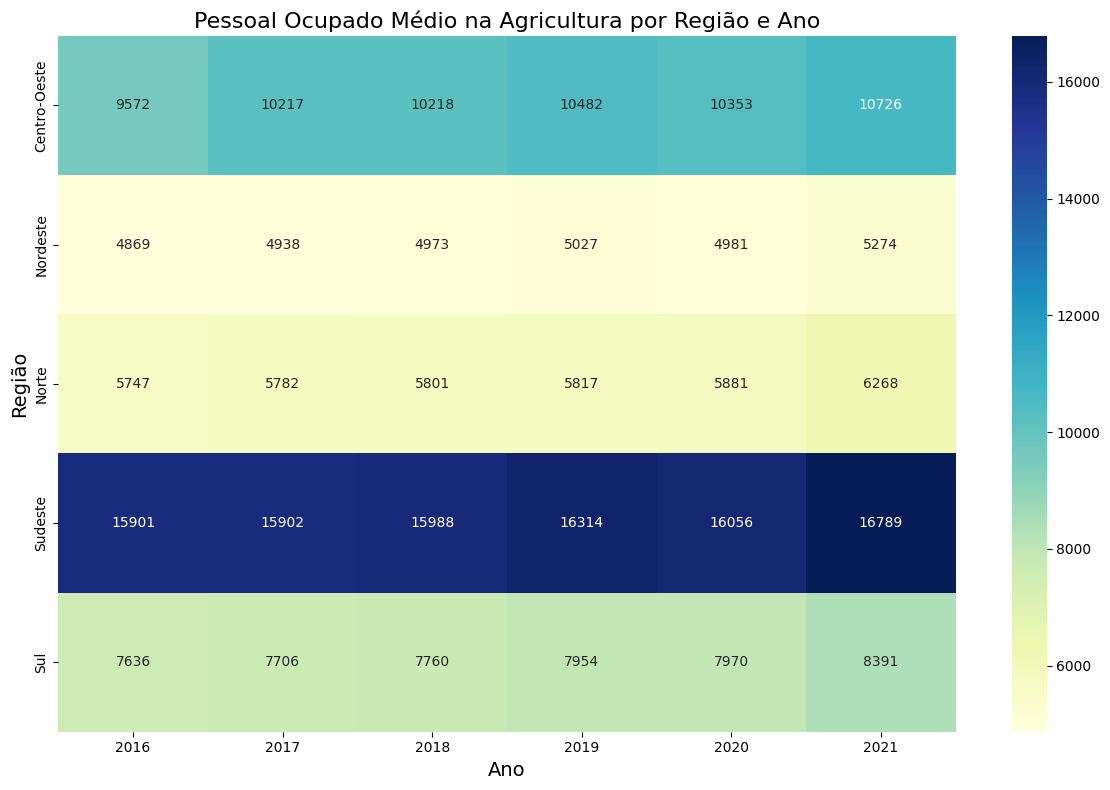

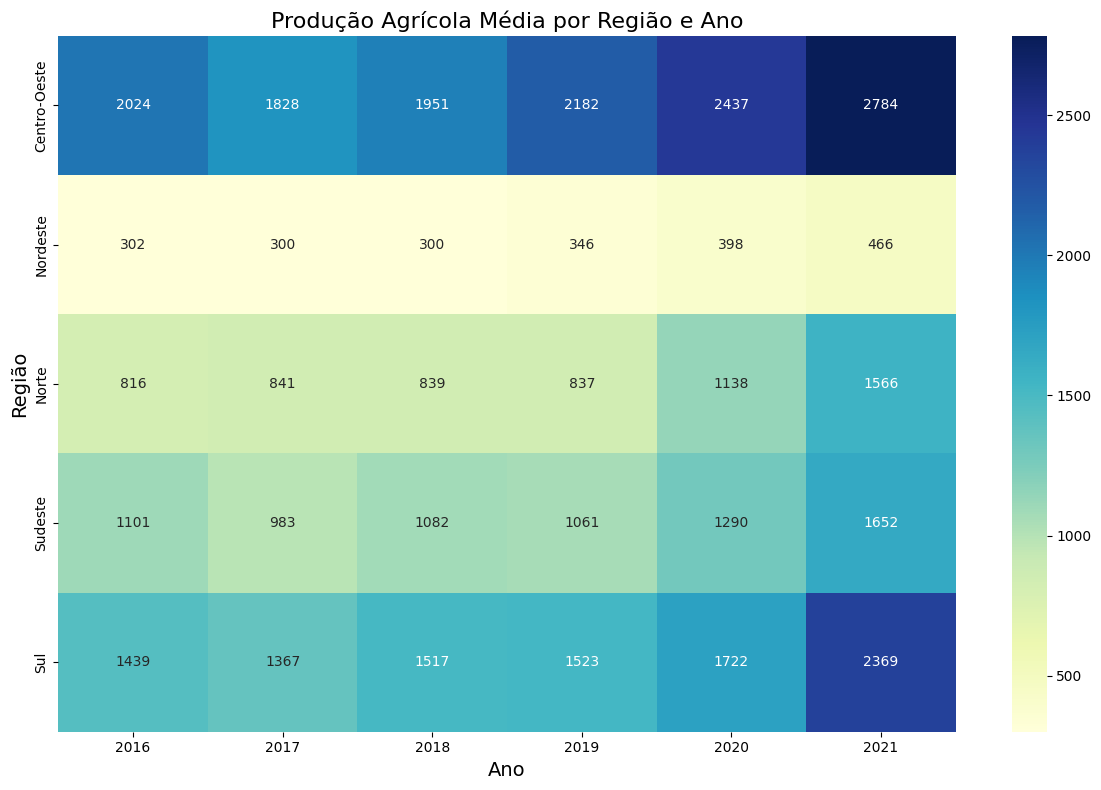

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é o seu DataFrame carregado

# Garantir que as colunas são numéricas e tratar NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce') # Garantir que Ano é numérico para agrupar

# Remover NaNs nas colunas essenciais
df_plot = df.copy()
df_plot.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao', 'Ano'], inplace=True)

# --- Heatmap para Pessoal Ocupado Médio por Região e Ano ---

# Agrupar por Ano e Região e calcular a média do Pessoal Ocupado
df_pessoal_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])['PessoalOcupado'].mean().reset_index()

# Pivotar a tabela para o formato de mapa de calor
df_pessoal_heatmap = df_pessoal_anual_regiao.pivot(index='Regiao', columns='Ano', values='PessoalOcupado')

plt.figure(figsize=(12, 8))
sns.heatmap(df_pessoal_heatmap, annot=True, fmt=".0f", cmap="YlGnBu") # fmt=".0f" formata como inteiro

plt.title('Pessoal Ocupado Médio na Agricultura por Região e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.tight_layout()
plt.show()

# --- Heatmap para Produção Agrícola Média por Região e Ano ---

# Agrupar por Ano e Região e calcular a média da Produção Agrícola
df_producao_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])['VlProducaoAgricola'].mean().reset_index()

# Pivotar a tabela para o formato de mapa de calor
df_producao_heatmap = df_producao_anual_regiao.pivot(index='Regiao', columns='Ano', values='VlProducaoAgricola')

plt.figure(figsize=(12, 8))
sns.heatmap(df_producao_heatmap, annot=True, fmt=".0f", cmap="YlGnBu") # fmt=".0f" formata como inteiro

plt.title('Produção Agrícola Média por Região e Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Região', fontsize=14)
plt.tight_layout()
plt.show()

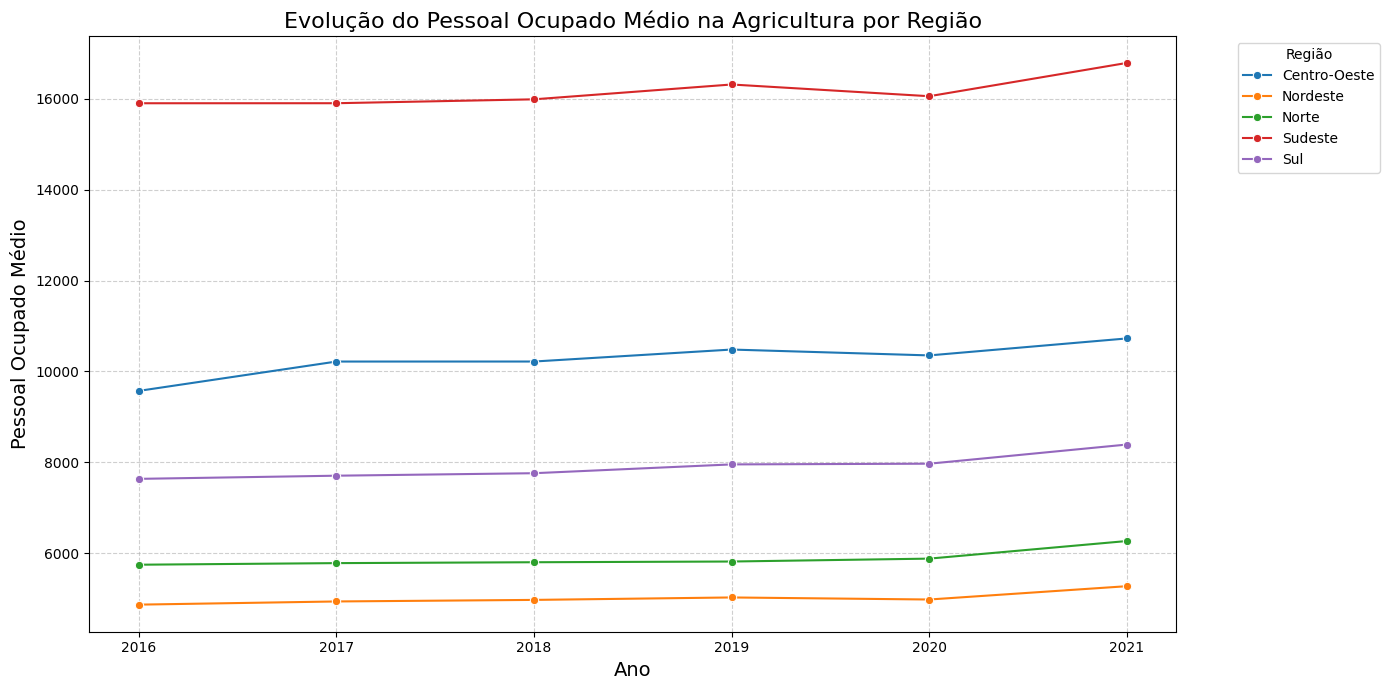

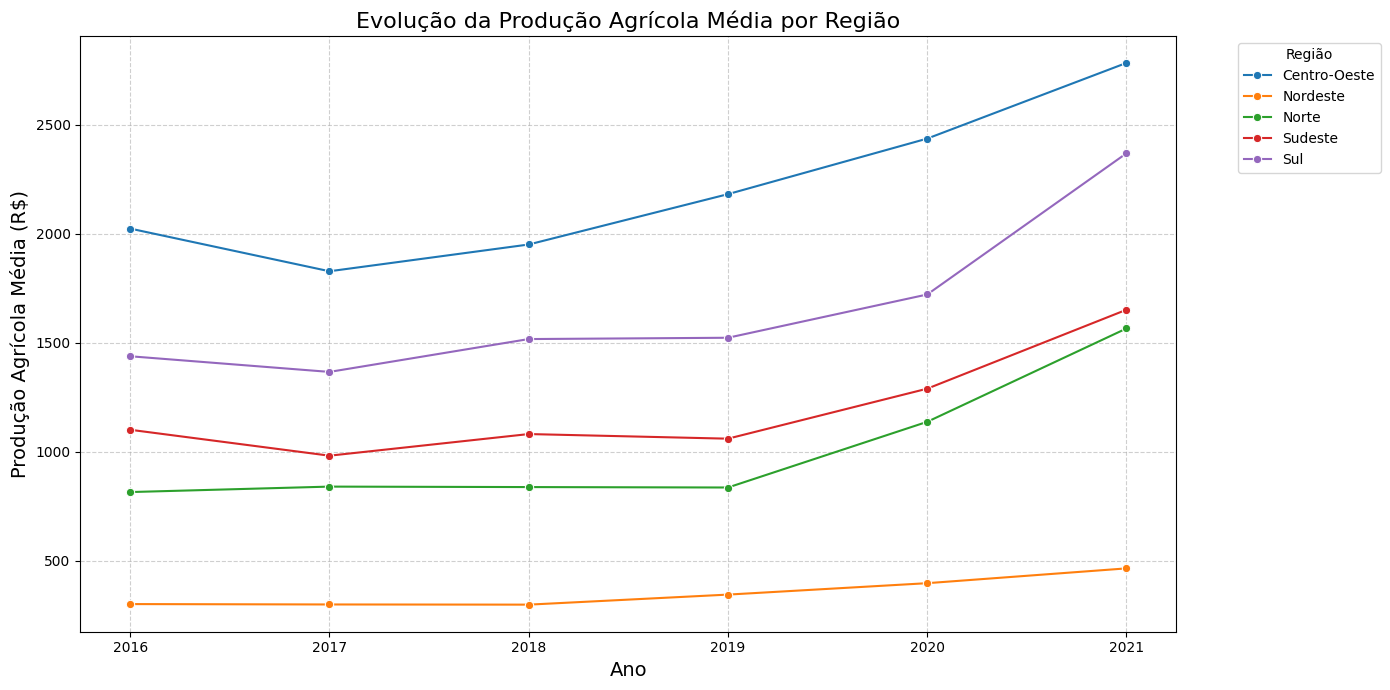

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'df' é o seu DataFrame carregado

# Garantir que as colunas são numéricas e tratar NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Remover NaNs nas colunas essenciais
df_plot = df.copy()
df_plot.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao', 'Ano'], inplace=True)

# Agrupar por Ano e Região e calcular as médias
df_anual_regiao = df_plot.groupby(['Ano', 'Regiao'])[['PessoalOcupado', 'VlProducaoAgricola']].mean().reset_index()

# --- Gráfico de Linha para Pessoal Ocupado Médio por Região e Ano ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_anual_regiao, x='Ano', y='PessoalOcupado', hue='Regiao', marker='o')
plt.title('Evolução do Pessoal Ocupado Médio na Agricultura por Região', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Pessoal Ocupado Médio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Gráfico de Linha para Produção Agrícola Média por Região e Ano ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_anual_regiao, x='Ano', y='VlProducaoAgricola', hue='Regiao', marker='o')
plt.title('Evolução da Produção Agrícola Média por Região', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Produção Agrícola Média (R$)', fontsize=14)
# Considere escala logarítmica para o eixo Y se a produção variar muito entre regiões ou anos
# plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import statsmodels.api as sm

# Supondo que 'df' é o seu DataFrame carregado

# Garanta que as colunas são numéricas e trate NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')

# Remover NaNs nas colunas essenciais
df_reg = df.copy()
df_reg.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao'], inplace=True)

# Filtrar dados para Sudeste e Nordeste
df_sudeste = df_reg[df_reg['Regiao'] == 'Sudeste'].copy()
df_nordeste = df_reg[df_reg['Regiao'] == 'Nordeste'].copy()

# --- Regressão para o Sudeste ---
if not df_sudeste.empty:
    X_sudeste = df_sudeste[['PessoalOcupado']]
    y_sudeste = df_sudeste['VlProducaoAgricola']
    X_sudeste = sm.add_constant(X_sudeste) # Adicionar constante
    modelo_sudeste = sm.OLS(y_sudeste, X_sudeste).fit()
    print("Resumo da Regressão Linear para o Sudeste:")
    print(modelo_sudeste.summary())
else:
    print("DataFrame para o Sudeste está vazio. Não é possível rodar a regressão.")


print("\n" + "="*50 + "\n") # Separador


# --- Regressão para o Nordeste ---
if not df_nordeste.empty:
    X_nordeste = df_nordeste[['PessoalOcupado']]
    y_nordeste = df_nordeste['VlProducaoAgricola']
    X_nordeste = sm.add_constant(X_nordeste) # Adicionar constante
    modelo_nordeste = sm.OLS(y_nordeste, X_nordeste).fit()
    print("Resumo da Regressão Linear para o Nordeste:")
    print(modelo_nordeste.summary())
else:
     print("DataFrame para o Nordeste está vazio. Não é possível rodar a regressão.")

Resumo da Regressão Linear para o Sudeste:
                            OLS Regression Results                            
Dep. Variable:     VlProducaoAgricola   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.524
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.217
Time:                        17:29:01   Log-Likelihood:                -91553.
No. Observations:               10008   AIC:                         1.831e+05
Df Residuals:                   10006   BIC:                         1.831e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

In [12]:
import pandas as pd
import statsmodels.api as sm

# Supondo que 'df' é o seu DataFrame carregado

# Garanta que as colunas são numéricas e trate NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')

# Remover NaNs nas colunas essenciais e focar apenas em Sudeste e Nordeste
df_reg_subset = df[df['Regiao'].isin(['Sudeste', 'Nordeste'])].copy()
df_reg_subset.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao'], inplace=True)

# Criar variável dummy para o Sudeste (Nordeste será a categoria de referência)
df_reg_subset['IsSudeste'] = (df_reg_subset['Regiao'] == 'Sudeste').astype(int)

# Criar termo de interação: IsSudeste * PessoalOcupado
df_reg_subset['IsSudeste_x_PessoalOcupado'] = df_reg_subset['IsSudeste'] * df_reg_subset['PessoalOcupado']


# Definir variáveis independentes (X) e dependente (y)
# Incluímos PessoalOcupado, IsSudeste (dummy) e o termo de interação
X = df_reg_subset[['PessoalOcupado', 'IsSudeste', 'IsSudeste_x_PessoalOcupado']]
y = df_reg_subset['VlProducaoAgricola']

# Adicionar uma constante ao modelo
X = sm.add_constant(X)

# Criar e Treinar o Modelo de Regressão Linear
modelo_interacao = sm.OLS(y, X).fit()

# Avaliar o Modelo
print("Resumo da Regressão Linear com Interação (Comparando Sudeste e Nordeste):")
print(modelo_interacao.summary())

Resumo da Regressão Linear com Interação (Comparando Sudeste e Nordeste):
                            OLS Regression Results                            
Dep. Variable:     VlProducaoAgricola   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     394.7
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          2.46e-249
Time:                        17:29:17   Log-Likelihood:            -1.8478e+05
No. Observations:               20772   AIC:                         3.696e+05
Df Residuals:                   20768   BIC:                         3.696e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

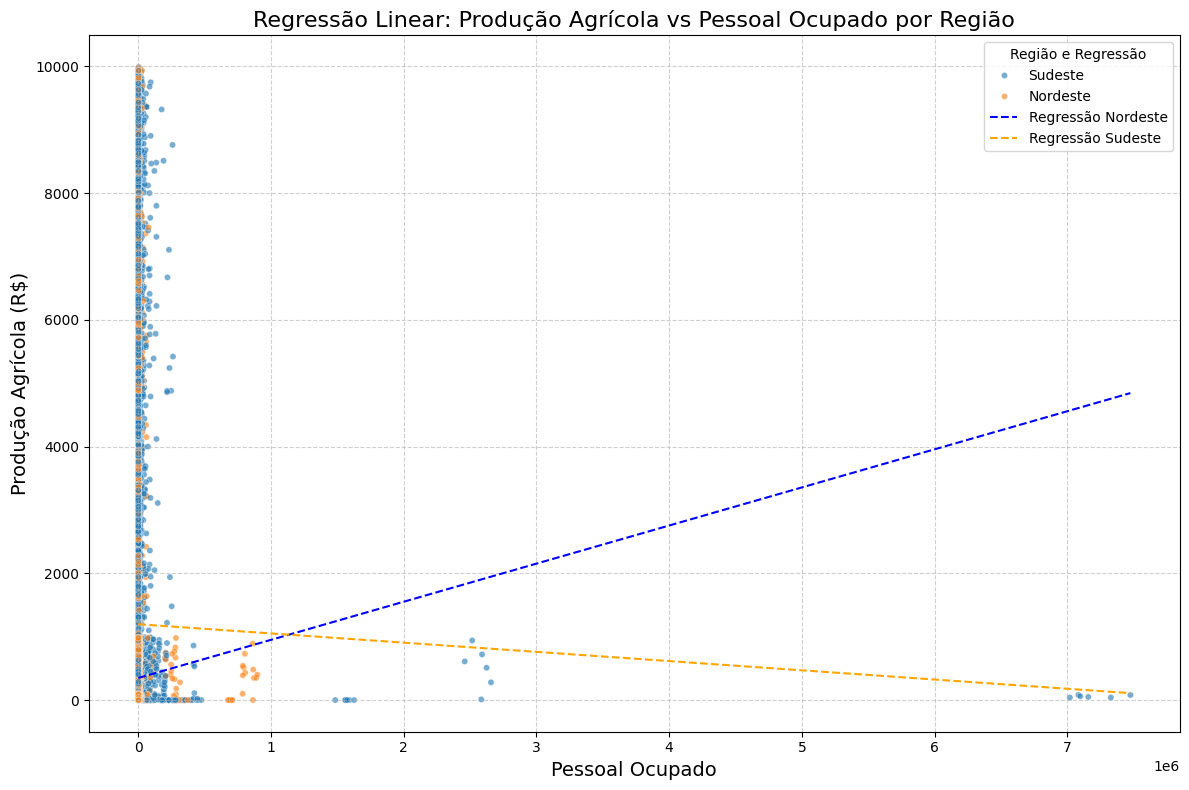

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Supondo que 'df' é o seu DataFrame carregado e as colunas foram limpas como antes

# Garanta que as colunas são numéricas e trate NaNs
df['PessoalOcupado'] = pd.to_numeric(df['PessoalOcupado'], errors='coerce')
df['VlProducaoAgricola'] = pd.to_numeric(df['VlProducaoAgricola'], errors='coerce')

# Filtrar dados para Sudeste e Nordeste e remover NaNs nas colunas essenciais
df_plot_reg = df[df['Regiao'].isin(['Sudeste', 'Nordeste'])].copy()
df_plot_reg.dropna(subset=['PessoalOcupado', 'VlProducaoAgricola', 'Regiao'], inplace=True)

# Criar variável dummy para o Sudeste
df_plot_reg['IsSudeste'] = (df_plot_reg['Regiao'] == 'Sudeste').astype(int)

# --- Plotagem da Regressão com Interação ---

plt.figure(figsize=(12, 8))

# Scatter plot dos pontos de dados originais, coloridos por Região
sns.scatterplot(
    data=df_plot_reg,
    x='PessoalOcupado',
    y='VlProducaoAgricola',
    hue='Regiao',
    alpha=0.6,
    s=20 # Tamanho dos pontos
)

# Obter os coeficientes do modelo ajustado
# Assumindo que você já rodou o código da regressão com interação (modelo_interacao)
if 'modelo_interacao' in locals(): # Verifica se o modelo foi ajustado
    coef_constante = modelo_interacao.params['const']
    coef_pessoal_ocupado = modelo_interacao.params['PessoalOcupado']
    coef_is_sudeste = modelo_interacao.params['IsSudeste']
    coef_interacao = modelo_interacao.params['IsSudeste_x_PessoalOcupado']

    # Gerar pontos para plotar as linhas de regressão
    # Criar uma faixa de valores para Pessoal Ocupado (baseado nos seus dados)
    x_vals = np.linspace(df_plot_reg['PessoalOcupado'].min(), df_plot_reg['PessoalOcupado'].max(), 100)

    # Linha de Regressão para o Nordeste (IsSudeste = 0)
    # y = β₀ + β₁ * PessoalOcupado
    y_nordeste = coef_constante + coef_pessoal_ocupado * x_vals
    plt.plot(x_vals, y_nordeste, color='blue', linestyle='--', label='Regressão Nordeste') # Use a cor que o scatterplot usou para Nordeste

    # Linha de Regressão para o Sudeste (IsSudeste = 1)
    # y = (β₀ + β₂ * 1) + (β₁ + β₄ * 1) * PessoalOcupado
    # y = (β₀ + coef_is_sudeste) + (coef_pessoal_ocupado + coef_interacao) * PessoalOcupado
    y_sudeste = (coef_constante + coef_is_sudeste) + (coef_pessoal_ocupado + coef_interacao) * x_vals
    plt.plot(x_vals, y_sudeste, color='orange', linestyle='--', label='Regressão Sudeste') # Use a cor que o scatterplot usou para Sudeste

    # Adicionar título e rótulos
    plt.title('Regressão Linear: Produção Agrícola vs Pessoal Ocupado por Região', fontsize=16)
    plt.xlabel('Pessoal Ocupado', fontsize=14)
    plt.ylabel('Produção Agrícola (R$)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Região e Regressão')
    plt.tight_layout()
    plt.show()

else:
    print("Execute o código da regressão linear com interação (modelo_interacao) primeiro.")